In [3]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np 

In [4]:
TRAIN_DIR = 'images/train'
TEST_DIR = 'images/test'

In [5]:
def createdataframe(dir):
    image_paths = []
    labels = []
    
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir, label)):
            image_paths.append(os.path.join(dir, label, imagename))
            labels.append(label)
        print(label, "completed")
    
    return image_paths, labels

In [6]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [7]:
print(train)

                                image     label
0            images/train\angry\0.jpg     angry
1            images/train\angry\1.jpg     angry
2           images/train\angry\10.jpg     angry
3        images/train\angry\10002.jpg     angry
4        images/train\angry\10016.jpg     angry
...                               ...       ...
28816  images/train\surprise\9969.jpg  surprise
28817  images/train\surprise\9985.jpg  surprise
28818  images/train\surprise\9990.jpg  surprise
28819  images/train\surprise\9992.jpg  surprise
28820  images/train\surprise\9996.jpg  surprise

[28821 rows x 2 columns]


In [8]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [9]:
print(test)
print(test['image'])

                              image     label
0       images/test\angry\10052.jpg     angry
1       images/test\angry\10065.jpg     angry
2       images/test\angry\10079.jpg     angry
3       images/test\angry\10095.jpg     angry
4       images/test\angry\10121.jpg     angry
...                             ...       ...
7061  images/test\surprise\9806.jpg  surprise
7062  images/test\surprise\9830.jpg  surprise
7063  images/test\surprise\9853.jpg  surprise
7064  images/test\surprise\9878.jpg  surprise
7065   images/test\surprise\993.jpg  surprise

[7066 rows x 2 columns]
0         images/test\angry\10052.jpg
1         images/test\angry\10065.jpg
2         images/test\angry\10079.jpg
3         images/test\angry\10095.jpg
4         images/test\angry\10121.jpg
                    ...              
7061    images/test\surprise\9806.jpg
7062    images/test\surprise\9830.jpg
7063    images/test\surprise\9853.jpg
7064    images/test\surprise\9878.jpg
7065     images/test\surprise\993.jpg
Name:

In [10]:
from tqdm.notebook import tqdm

In [11]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, color_mode='grayscale')  # Updated
        img = np.array(img)
        features.append(img)
    
    features = np.array(features)
    features = features.reshape(len(features), 48, 48, 1)
    return features


In [12]:
pip install Pillow --upgrade


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
pip show Pillow


Name: pillow
Version: 11.2.1
Summary: Python Imaging Library (Fork)
Home-page: https://python-pillow.github.io
Author: 
Author-email: "Jeffrey A. Clark" <aclark@aclark.net>
License: 
Location: C:\Users\Surbhi\AppData\Local\Programs\Python\Python312\Lib\site-packages
Requires: 
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [14]:
import PIL
print(PIL.__version__)


11.2.1


In [15]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, color_mode='grayscale')  # Updated
        img = np.array(img)
        features.append(img)
    
    features = np.array(features)
    features = features.reshape(len(features), 48, 48, 1)
    return features

In [16]:
train_features = extract_features(train['image'])

  0%|          | 0/28821 [00:00<?, ?it/s]

In [17]:
!pip uninstall Pillow -y
!pip install Pillow --upgrade


Found existing installation: pillow 11.2.1
Uninstalling pillow-11.2.1:
  Successfully uninstalled pillow-11.2.1


You can safely remove it manually.


  Using cached pillow-11.2.1-cp312-cp312-win_amd64.whl.metadata (9.1 kB)
Using cached pillow-11.2.1-cp312-cp312-win_amd64.whl (2.7 MB)



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
train_features = extract_features(train['image'])


  0%|          | 0/28821 [00:00<?, ?it/s]

In [19]:
pip install --upgrade Pillow


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
import PIL
print(PIL.__version__)  # This should show the Pillow version without error


11.2.1


In [21]:
from PIL import Image  # Manually importing PIL
from keras.utils import load_img
import numpy as np
from tqdm import tqdm


In [22]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = Image.open(image).convert('L')  # 'L' is for grayscale
        img = np.array(img)
        features.append(img)
    
    features = np.array(features)
    features = features.reshape(len(features), 48, 48, 1)
    return features


In [23]:
train_features = extract_features(train['image'])
print(f"Extracted Features Shape: {train_features.shape}")

100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 28821/28821 [00:06<00:00, 4705.33it/s]


Extracted Features Shape: (28821, 48, 48, 1)


In [33]:
test_features = extract_features(test['image'])
print(f"Extracted Features Shape: {train_features.shape}")

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 7066/7066 [00:01<00:00, 4047.80it/s]

Extracted Features Shape: (28821, 48, 48, 1)


In [25]:
x_train = train_features/255.0
x_test = test_features/255.0

In [26]:
from sklearn.preprocessing import LabelEncoder

In [35]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [36]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [37]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [39]:
from keras.layers import Input

# Define the input layer with input shape
model = Sequential()
model.add(Input(shape=(48, 48, 1)))  # Define input shape here

# Convolutional layers
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())

# Fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(7, activation='softmax'))  # Output layer


In [41]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [44]:
model.fit(x = x_train,y = y_train, batch_size = 128, epochs = 10, validation_data = (x_test,y_test))

Epoch 1/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 435s 2s/step - accuracy: 0.4996 - loss: 1.3107 - val_accuracy: 0.5352 - val_loss: 1.2172
Epoch 2/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 447s 2s/step - accuracy: 0.5105 - loss: 1.2825 - val_accuracy: 0.5512 - val_loss: 1.1786
Epoch 3/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 441s 2s/step - accuracy: 0.5304 - loss: 1.2344 - val_accuracy: 0.5580 - val_loss: 1.1688
Epoch 4/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 355s 2s/step - accuracy: 0.5446 - loss: 1.1979 - val_accuracy: 0.5645 - val_loss: 1.1484
Epoch 5/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 310s 1s/step - accuracy: 0.5554 - loss: 1.1827 - val_accuracy: 0.5747 - val_loss: 1.1268
Epoch 6/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 300s 1s/step - accuracy: 0.5665 - loss: 1.1306 - val_accuracy: 0.5722 - val_loss: 1.1207
Epoch 7/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 321s 1s/step - accuracy: 0.5657 - loss: 1.1331 - val_accuracy: 0.5836 - val_loss: 1.1039
Epoch 8/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 283s 1s/step - accuracy: 0.5860 - loss: 1.1039 - val_accu

In [46]:
model_json = model.to_json()
with open("sentimentanalysis.json",'w') as json_file:
    json_file.write(model_json)
model.save("sentimentanalysis.keras")    

In [47]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [50]:
def ef(image):
    img = load_img(image, color_mode='grayscale', target_size=(48, 48))
    feature = np.array(img)
    feature = feature.reshape(1, 48, 48, 1) / 255.0  # Normalize the image to [0,1] range
    return feature

In [51]:
image = 'images/train/angry/22.jpg'
print("original image is of angry")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is",pred_label)

original image is of angry
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 781ms/step
model prediction is angry


In [53]:
image = 'images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is",pred_label)

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
model prediction is sad


In [55]:
image = 'images/train/happy/24.jpg'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is",pred_label)

original image is of happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
model prediction is happy


In [57]:
!pip install matplotlib


   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ------- -------------------------------- 1.6/8.1 MB 8.4 MB/s eta 0:00:01
   -------------- ------------------------- 2.9/8.1 MB 6.7 MB/s eta 0:00:01
   ---------------- ----------------------- 3.4/8.1 MB 6.5 MB/s eta 0:00:01
   ----------------------------- ---------- 6.0/8.1 MB 7.1 MB/s eta 0:00:01
   -------------------------------------- - 7.9/8.1 MB 7.5 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 7.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   --------------------------------- ------ 1.8/2.2 MB 9.1 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 8.4 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [58]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
model prediction is sad


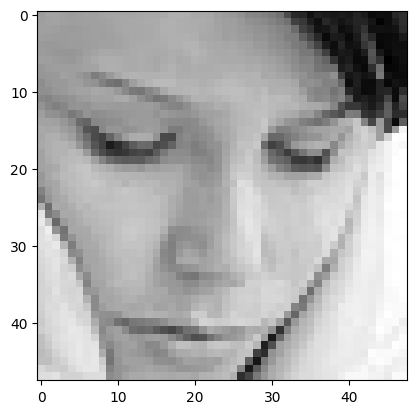

In [59]:
image = 'images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
model prediction is happy


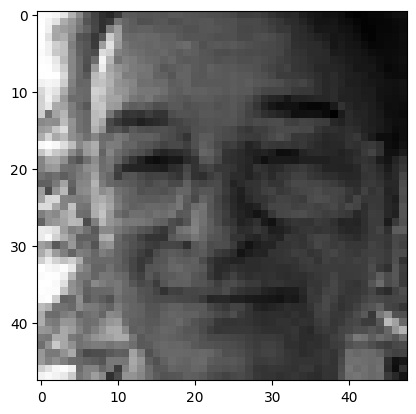

In [60]:
image = 'images/train/happy/24.jpg'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of disgust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
model prediction is disgust


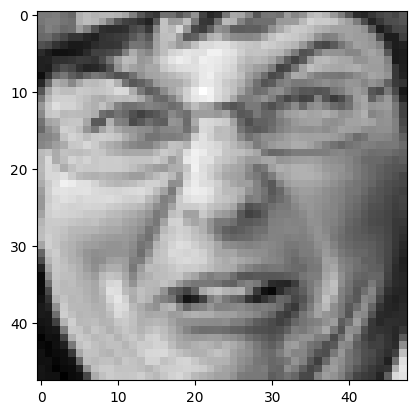

In [61]:
image = 'images/train/disgust/299.jpg'
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')